# Exploratory analysis on NYC Airbnb data

Airbnb data can be analyzed to understand the customers' and providers' behavior on the platform and drive business initiatives for additional services.

Data Source: https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

## Loading Data

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
airbnb = pd.read_csv("new-york-city-airbnb-open-data/AB_NYC_2019.csv")
airbnb.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [3]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

We have seen the size of the data and the data types of each column. For continuous columns, we may look into their relationship with Price. For categorical columns, we can create panel plots (facet grids) to explore how prices are distributed in different groups. We may also map them to ones or zeros for predictive analysis. Besides, there are missing values in the data which require cleaning the NaN values.

## Wrangling and cleaning data

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


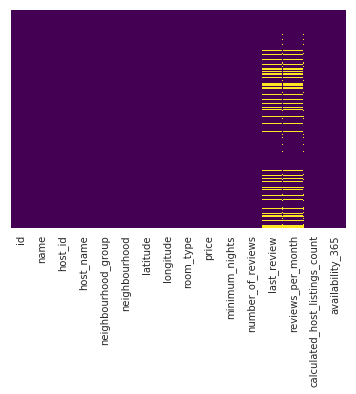

In [4]:
# Set plot style
plt.style.use('ggplot')
sns.set_style('darkgrid')

print(airbnb.isnull().sum())
sns.heatmap(airbnb.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In our case, missing data that is observed does not need special treatment. $\texttt{name},\texttt{host_name},\texttt{last_review}$ provides text information and are irrelevant and insignificant to our analysis - we can simply drop these columns. $\texttt{reviews_per_month}$ only needs simple handling; we can replace missing values with 0.0 which represents that there's no review last month.

In [5]:
airbnb.drop(['name', 'host_name', 'last_review'], axis=1, inplace=True)
airbnb.fillna({'reviews_per_month': 0}, inplace=True)
airbnb.head()

id  host_id neighbourhood_group neighbourhood  latitude  longitude  \
0  2539     2787            Brooklyn    Kensington  40.64749  -73.97237   
1  2595     2845           Manhattan       Midtown  40.75362  -73.98377   
2  3647     4632           Manhattan        Harlem  40.80902  -73.94190   
3  3831     4869            Brooklyn  Clinton Hill  40.68514  -73.95976   
4  5022     7192           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews  \
0     Private room    149               1                  9   
1  Entire home/apt    225               1                 45   
2     Private room    150               3                  0   
3  Entire home/apt     89               1                270   
4  Entire home/apt     80              10                  9   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2               0.00                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

Examine the unique values and the number of unique values for categorical columns.

In [6]:
for col in ['neighbourhood_group', 'neighbourhood', 'room_type']:
    print(airbnb[col].unique(), airbnb[col].nunique(), '\n')

['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx'] 5 

['Kensington' 'Midtown' 'Harlem' 'Clinton Hill' 'East Harlem'
 'Murray Hill' 'Bedford-Stuyvesant' "Hell's Kitchen" 'Upper West Side'
 'Chinatown' 'South Slope' 'West Village' 'Williamsburg' 'Fort Greene'
 'Chelsea' 'Crown Heights' 'Park Slope' 'Windsor Terrace' 'Inwood'
 'East Village' 'Greenpoint' 'Bushwick' 'Flatbush' 'Lower East Side'
 'Prospect-Lefferts Gardens' 'Long Island City' 'Kips Bay' 'SoHo'
 'Upper East Side' 'Prospect Heights' 'Washington Heights' 'Woodside'
 'Brooklyn Heights' 'Carroll Gardens' 'Gowanus' 'Flatlands' 'Cobble Hill'
 'Flushing' 'Boerum Hill' 'Sunnyside' 'DUMBO' 'St. George' 'Highbridge'
 'Financial District' 'Ridgewood' 'Morningside Heights' 'Jamaica'
 'Middle Village' 'NoHo' 'Ditmars Steinway' 'Flatiron District'
 'Roosevelt Island' 'Greenwich Village' 'Little Italy' 'East Flatbush'
 'Tompkinsville' 'Astoria' 'Clason Point' 'Eastchester' 'Kingsbridge'
 'Two Bridges' 'Queens Village' 'Rockaway Bea

## Exploring and visualizing data

$\texttt{name}, \texttt{host_name}, \texttt{host_id}$ may be useful. We can extract the tokens from names and run NLP to see what are the key words for higher review frenquency. But for a predictive analysis of housing price, these factors provide limited information - we can drop them.

In [7]:
# remove irrelevant columns
airbnb.drop(['id', 'host_id'], axis=1, inplace=True)

### Categorical columns

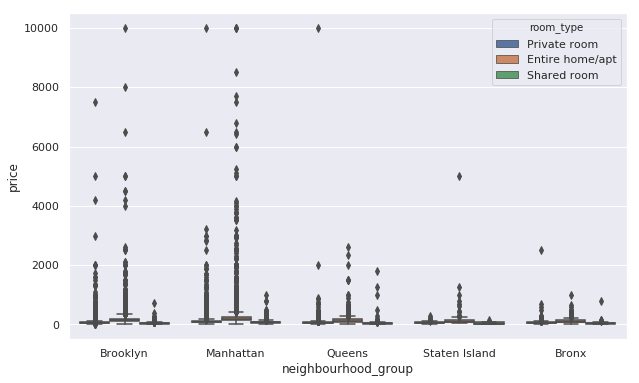

In [8]:
sns.set(rc={'figure.figsize':(10,6)})
# plot price according to categories
sns.boxplot(x='neighbourhood_group', y='price', hue='room_type', data=airbnb)

In [9]:
airbnb.groupby('neighbourhood_group')['price'].describe().transpose()

neighbourhood_group        Bronx      Brooklyn     Manhattan        Queens  \
count                1091.000000  20104.000000  21661.000000   5666.000000   
mean                   87.496792    124.383207    196.875814     99.517649   
std                   106.709349    186.873538    291.383183    167.102155   
min                     0.000000      0.000000      0.000000     10.000000   
25%                    45.000000     60.000000     95.000000     50.000000   
50%                    65.000000     90.000000    150.000000     75.000000   
75%                    99.000000    150.000000    220.000000    110.000000   
max                  2500.000000  10000.000000  10000.000000  10000.000000   

neighbourhood_group  Staten Island  
count                   373.000000  
mean                    114.812332  
std                     277.620403  
min                      13.000000  
25%                      50.000000  
50%                      75.000000  
75%                     110.000000  
max                    5000.000000

There're some extreme values in price and we need to remove them for a better visualization.

Text(0.5, 1.0, 'Density and distribution of prices for each room type')

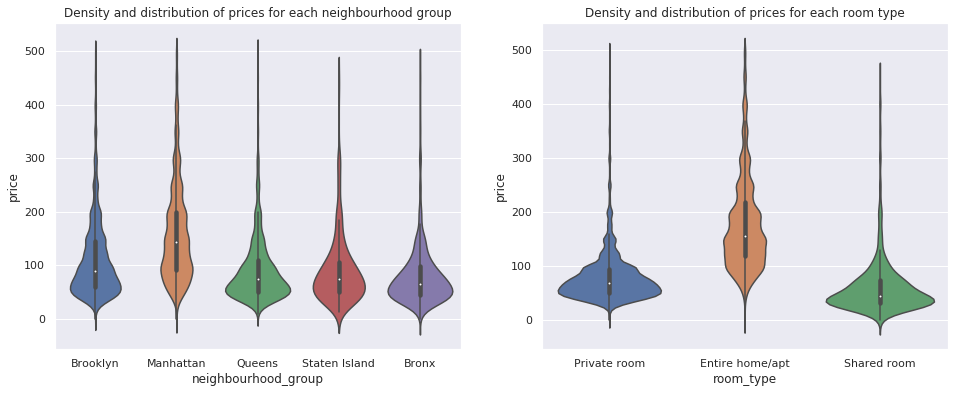

In [10]:
airbnb = airbnb[airbnb['price']<500]

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.violinplot(x='neighbourhood_group', y='price', data=airbnb)
plt.title('Density and distribution of prices for each neighbourhood group')

plt.subplot(1,2,2)
sns.violinplot(x='room_type', y='price', data=airbnb)
plt.title('Density and distribution of prices for each room type')

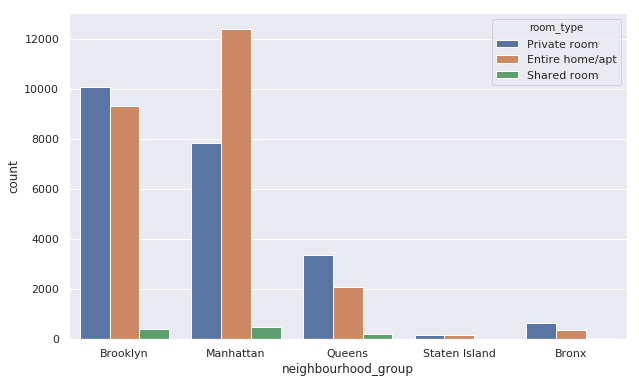

In [11]:
sns.countplot(x='neighbourhood_group', hue='room_type', data=airbnb)

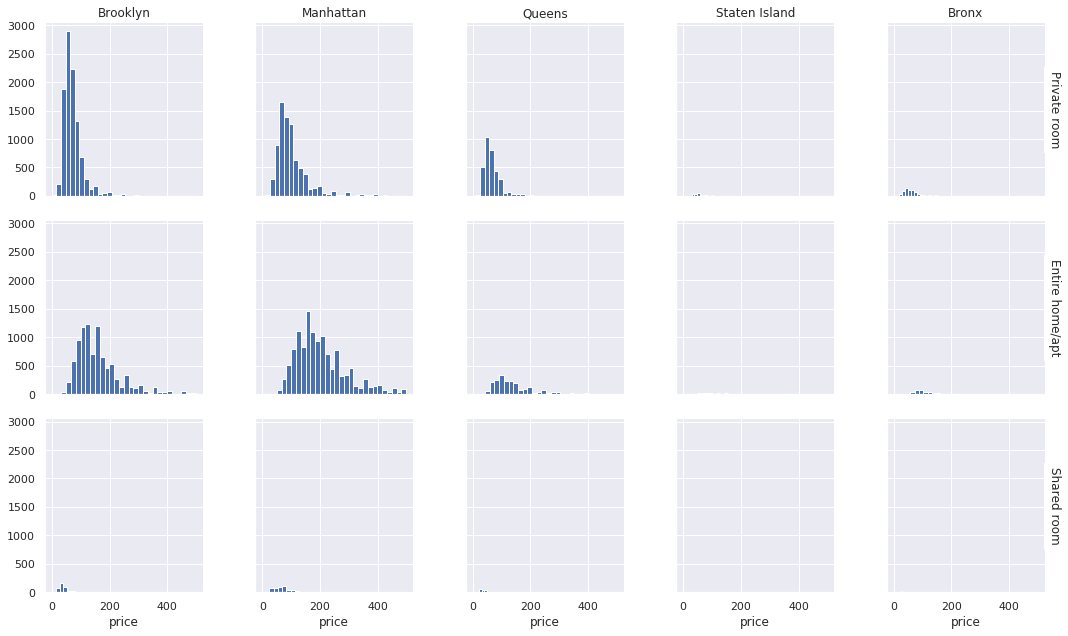

In [12]:
g = sns.FacetGrid(data=airbnb, row='room_type', col='neighbourhood_group', margin_titles=True)
g.map(plt.hist, 'price', bins=30)
[plt.setp(ax.texts, text="") for ax in g.axes.flat]
g.set_titles(row_template = '{row_name}', col_template = '{col_name}')

With the statistics table and the violin table, we can definitely observe a couple of things about the distribution of prices for the listings in NYC. First, we can state that Manhattan has the highest price ranges with $\$$196 as average observation, followed by Brooklyn with $\$$124 per night. Queens and Staten Island have similar distributions. Bronx is the cheapest of them all. Also, the entire home/apt has the highest price ranges, followed by private rooms. Shared rooms are the cheapest. These observations match our expectations; for example, there's no doubt that Manhattan is one of the most expensive places to live in the world, and a shared room has lower comfort standards than a private room.

From the count plot, we can notice most listings come from the neighbourhoods of Manhattan and Brooklyn. Not surprisingly, there are few shared rooms provided compared to other room types.

### Continuous columns

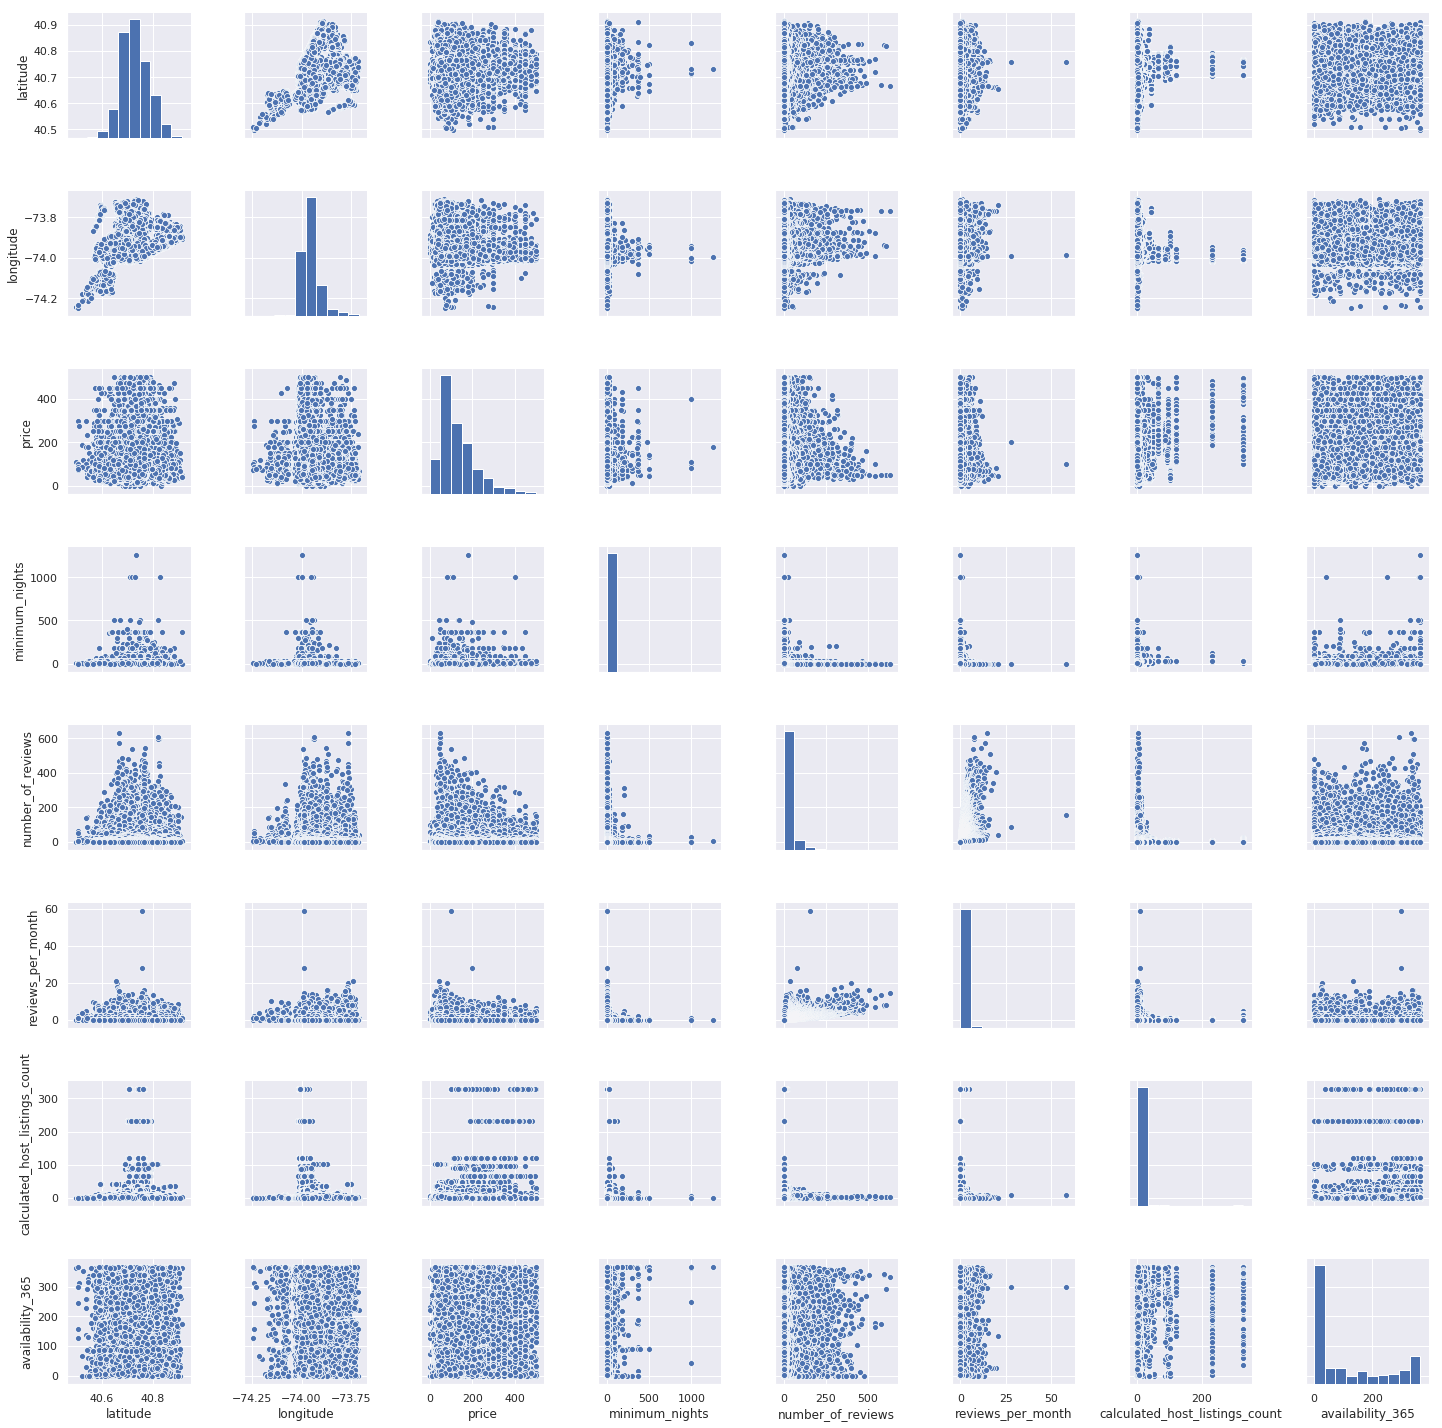

In [13]:
# map the relationship between continuous cols with price
sns.pairplot(airbnb)

The pairplot shows some correlation between continuous predictors and price; therefore we need to look into some distribution plots further.

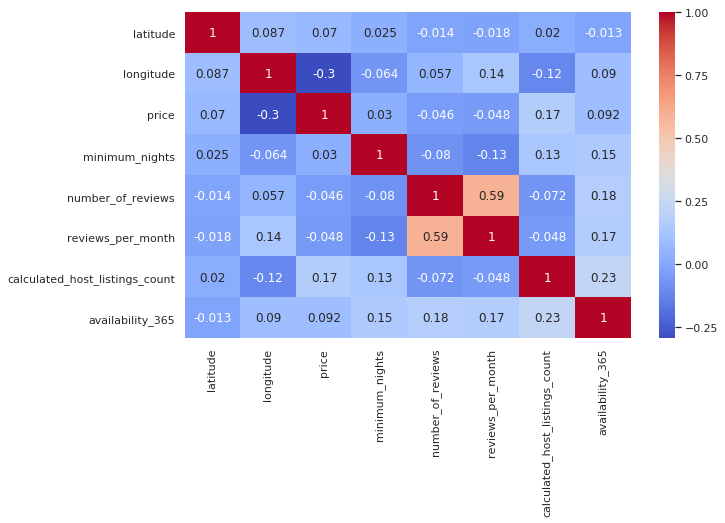

In [14]:
sns.heatmap(airbnb.corr(), cmap='coolwarm', annot=True)

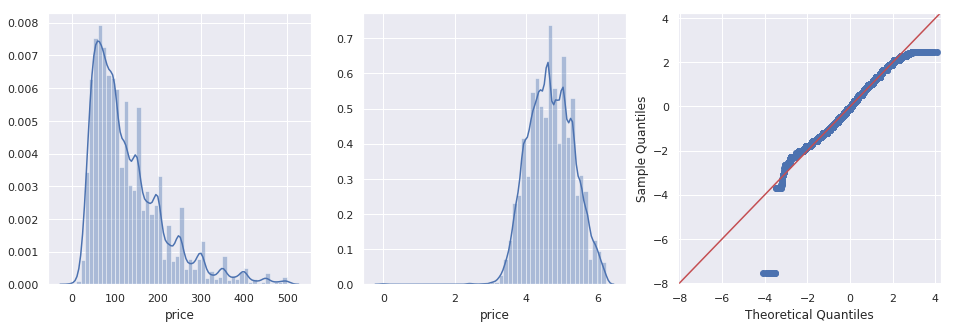

In [15]:
import statsmodels.api as sm
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,5))
sns.distplot(airbnb['price'], bins=50, ax=axes[0])
sns.distplot(np.log1p(airbnb['price']), ax=axes[1])
sm.qqplot(np.log1p(airbnb['price']), fit=True, line='45', ax=axes[2])
plt.show()

The heatmap shows that the number of listings of a host is positively correlated with price (+0.17). It looks like $\texttt{reviews per month}$ is highly correlated with $\texttt{total number of reviews}$ (+0.59). For predictive modleing, if we are going to include these features, we need to take multicollinearity issue into consideration. Optionally, we could also use tree-based models or regularization methods. The distribution of $\texttt{price}$ is right-skewed - use log transformation to meet the normality assumption in regression.

### Map to the city map

In [52]:
# !pip install plotly
# !pip install cufflinks
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
import plotly.graph_objects as go

init_notebook_mode(connected=True)
cf.go_offline()

In [63]:
Manhattan = airbnb[airbnb['neighbourhood_group'] == 'Manhattan']
Brooklyn = airbnb[airbnb['neighbourhood_group']=='Brooklyn']
Queens = airbnb[airbnb['neighbourhood_group']=='Queens']
Staten = airbnb[airbnb['neighbourhood_group']=='Staten Island']
Bronx = airbnb[airbnb['neighbourhood_group']=='Bronx']

fig = go.Figure(
    data=[
        {'x': Manhattan['longitude'], 'y': Manhattan['latitude'], 'text': Manhattan['price'], 'mode': 'markers', 'marker_size': 4, 'name': 'Manhattan'},
        {'x': Brooklyn['longitude'], 'y': Brooklyn['latitude'], 'text': Brooklyn['price'], 'mode': 'markers', 'marker_size': 4, 'name': 'Brooklyn'},
        {'x': Queens['longitude'], 'y': Queens['latitude'], 'text': Queens['price'], 'mode': 'markers', 'marker_size': 4, 'name': 'Queens'},
        {'x': Staten['longitude'], 'y': Staten['latitude'], 'text': Staten['price'], 'mode': 'markers', 'marker_size': 4, 'name': 'Staten'},
        {'x': Bronx['longitude'], 'y': Bronx['latitude'], 'text': Bronx['price'], 'mode': 'markers', 'marker_size': 4, 'name': 'Bronx'}
    ],
    layout={
        'xaxis': {'title': 'Longitude'},
        'yaxis': {'title': "Latitude"}
    }
)
fig.update_layout(
    autosize=False,
    width=1000,
    height=800)
fig.show()

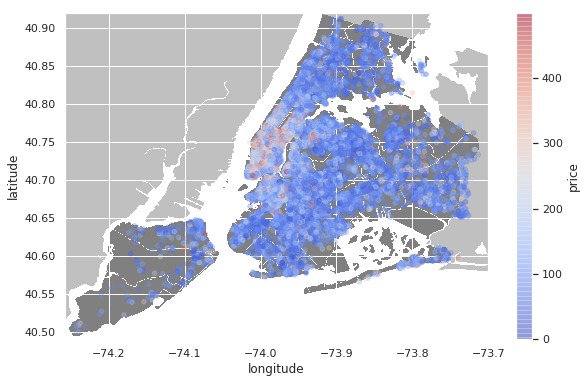

In [70]:
import urllib
cityImg = urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc = plt.imread(cityImg)
plt.imshow(nyc, zorder=0, extent=[-74.258, -73.7, 40.49,40.92])
ax = plt.gca()
airbnb.plot(kind='scatter', x='longitude', y='latitude', ax=ax, c='price', cmap='coolwarm', alpha=0.3)
plt.show()

### Most viewed listings

We can also look into most viewed listings, hosts with the most listings, listings with most availability, etc. and investige on their average price ranges.

In [120]:
airbnb.sort_values(by='number_of_reviews', ascending=False).head(10)

neighbourhood_group    neighbourhood  latitude  longitude  \
11759              Queens          Jamaica  40.66730  -73.76831   
2031            Manhattan           Harlem  40.82085  -73.94025   
2030            Manhattan           Harlem  40.82124  -73.93838   
2015            Manhattan           Harlem  40.82264  -73.94041   
13495              Queens          Jamaica  40.66939  -73.76975   
10623              Queens    East Elmhurst  40.77006  -73.87683   
1879            Manhattan  Lower East Side  40.71921  -73.99116   
20403              Queens    East Elmhurst  40.76335  -73.87007   
4870             Brooklyn       Park Slope  40.67926  -73.97711   
471              Brooklyn         Bushwick  40.70283  -73.92131   

             room_type  price  minimum_nights  number_of_reviews  \
11759     Private room     47               1                629   
2031      Private room     49               1                607   
2030      Private room     49               1                597   
2015      Private room     49               1                594   
13495     Private room     47               1                576   
10623     Private room     46               1                543   
1879      Private room     99               2                540   
20403     Private room     48               1                510   
4870   Entire home/apt    160               1                488   
471       Private room     60               3                480   

       reviews_per_month  calculated_host_listings_count  availability_365  
11759              14.58                               2               333  
2031                7.75                               3               293  
2030                7.72                               3               342  
2015                7.57                               3               339  
13495              13.40                               2               173  
10623              11.59                               5               163  
1879                6.95                               1               179  
20403              16.22                               5               341  
4870                8.14                               1               269  
471                 6.70                               1                 0

## Reference

1. Data exploration & mapping: https://www.kaggle.com/dgomonov/data-exploration-on-nyc-airbnb
2. Remove overlapping titles in facet grid: https://wckdouglas.github.io/2016/12/seaborn_annoying_title